Link shadowing losses:
Link N0 ↔ N1: Shadowing Loss = -12.06 dB
Link N0 ↔ N2: Shadowing Loss = -10.50 dB
Link N0 ↔ N3: Shadowing Loss = -10.19 dB
Link N0 ↔ N4: Shadowing Loss = -20.08 dB
Link N0 ↔ N5: Shadowing Loss = -11.81 dB
Link N1 ↔ N2: Shadowing Loss = 2.19 dB
Link N1 ↔ N3: Shadowing Loss = -6.69 dB
Link N1 ↔ N4: Shadowing Loss = -7.59 dB
Link N1 ↔ N5: Shadowing Loss = 0.42 dB
Link N2 ↔ N3: Shadowing Loss = -5.13 dB
Link N2 ↔ N4: Shadowing Loss = -6.11 dB
Link N2 ↔ N5: Shadowing Loss = 2.42 dB
Link N3 ↔ N4: Shadowing Loss = -14.78 dB
Link N3 ↔ N5: Shadowing Loss = -6.46 dB
Link N4 ↔ N5: Shadowing Loss = -7.27 dB


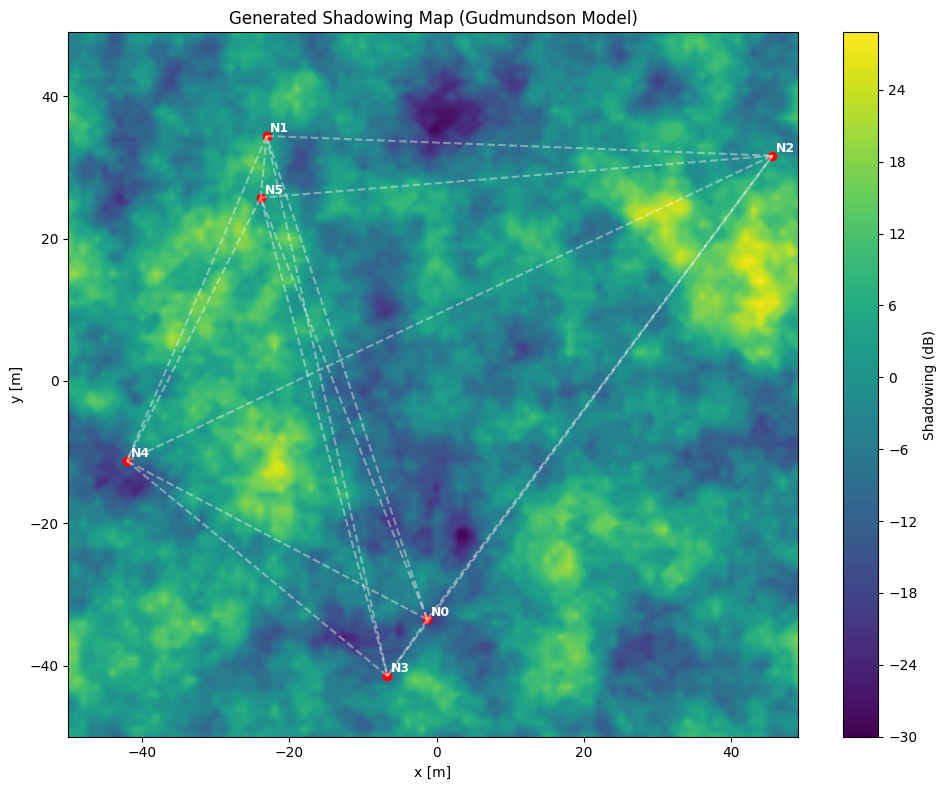


Shadowing map stats:
  Mean = -0.51 dB
  Standard deviation = 8.48 dB (expected: 9 dB)

Shadowing values at individual nodes:
  Node N0 @ (-1.29, -33.51): Shadowing = -17.52 dB
  Node N1 @ (-23.10, 34.44): Shadowing = 0.45 dB
  Node N2 @ (45.58, 31.66): Shadowing = 2.66 dB
  Node N3 @ (-6.70, -41.46): Shadowing = -9.91 dB
  Node N4 @ (-42.05, -11.25): Shadowing = -11.30 dB
  Node N5 @ (-23.89, 25.77): Shadowing = 0.76 dB


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from simulator.models.topology import Topology, CartesianCoordinate
from simulator.models.ChannelModel import ChannelModel

# === Setup topology and channel ===
topology = Topology(
    dspace_step=1,     # grid step 1 meter
    dspace_npt=100     # 100x100 grid points
)

model = ChannelModel(
    topology=topology,
    freq=2.4e9,
    coh_d=10,
    shadow_dev=9
)

model.generate_shadowing_map()
shadowing_map = model.shadowing_map
X, Y = topology.X, topology.Y

# === Sample random points in the map ===
n_points = 6
raw_points = np.random.uniform(-topology._size/2, topology._size/2, size=(n_points, 2))
points = [CartesianCoordinate(x, y) for x, y in raw_points]

# === Plot the map and the nodes ===
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, shadowing_map, levels=100, cmap='viridis')
plt.colorbar(label='Shadowing (dB)')
plt.title("Generated Shadowing Map (Gudmundson Model)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

# Plot the nodes on the map
for idx, pt in enumerate(points):
    plt.plot(pt.x, pt.y, 'ro')
    plt.text(pt.x + 0.5, pt.y + 0.5, f"N{idx}", color='white', fontsize=9, weight='bold')

# === Draw the links and calculate shadowing loss ===
print("Link shadowing losses:")
for i in range(n_points):
    for j in range(i+1, n_points):  # avoid duplicates and self-loops
        A, B = points[i], points[j]
        loss = model.get_link_shadowing_loss(A, B)

        # Draw the link as a line
        plt.plot([A.x, B.x], [A.y, B.y], color='white', alpha=0.4, linestyle='--')

        print(f"Link N{i} ↔ N{j}: Shadowing Loss = {loss:.2f} dB")

# === Show plot ===
plt.tight_layout()
plt.show()

# === Global statistics ===
print(f"\nShadowing map stats:")
print(f"  Mean = {np.mean(shadowing_map):.2f} dB")
print(f"  Standard deviation = {np.std(shadowing_map):.2f} dB (expected: {model.shadow_dev} dB)")

# === Local shadowing at nodes ===
print("\nShadowing values at individual nodes:")
for idx, pt in enumerate(points):
    val = model.get_shadowing_power_on_point(pt)
    print(f"  Node N{idx} @ ({pt.x:.2f}, {pt.y:.2f}): Shadowing = {val:.2f} dB")

